In [ ]:
# Copyright 2024 Google LLC

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at

#     https://www.apache.org/licenses/LICENSE-2.0

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

### Import necessary Libraries

In [30]:
from google.cloud import bigquery, storage
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Image

### Define Constants

In [26]:
USER_NUM = "0010"  # @param {type:"string"}
USER_ID = f"minigolf_{USER_NUM}"
PROJECT_ID = ""
BACKGROUND_IMAGE_BUCKET = ""
BQ_DATASET = ""
BQ_PREFIX = f"{PROJECT_ID}.{BQ_DATASET}"

### Golf with Gemini - Statistical Analysis
This section provides a statistical overview of your performance on the course by analyzing game data from all players.

We utilize the following key statistical indicators:

* **Average Score**: This shows the average score for all players, giving you an idea of how challenging the course is overall.
* **Median Score**: This score is the middle value when all scores are listed from lowest to highest. It's helpful because it's less affected by extreme scores, giving a more balanced view.
To make things even clearer, we've included a bar graph that visually shows the distribution of scores. This helps you see how many players fall into different score ranges.

Use this information to compare your performance to others and get a better understanding of your own golf game!

### There are 171 users played so far.

### User minigolf_0010's number of shots: 2

### Average number of shots: 2.44

### Median number of shots: 2.00

,Number of Shots,Number of Users
0,2,63
1,3,37
2,1,19
3,4,10
4,5,2
5,6,1
6,7,1
7,8,1


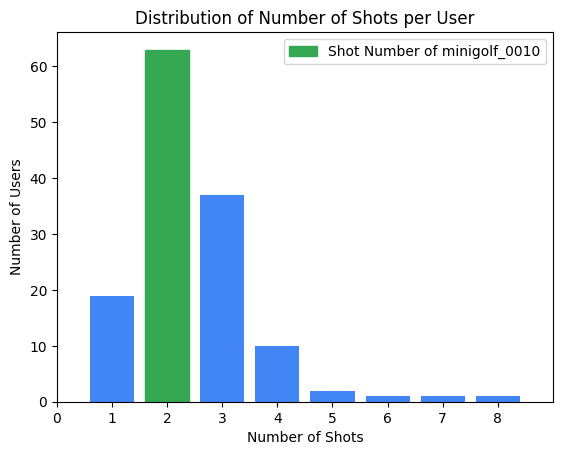

In [36]:
# Configure BigQuery client
bq_client = bigquery.Client()
query = f"SELECT * FROM {BQ_PREFIX}.tracking"

df = client.query(query).to_dataframe()
last_frame_per_user = df.groupby('user_id')['frame_number'].transform(max)
df_filtered = df[df['frame_number'] == last_frame_per_user]
df_filtered = df_filtered[df_filtered['distance'] < 30]
user_shot_counts = df_filtered.groupby('user_id')['shot_number'].first()
user_shot_counts = user_shot_counts[user_shot_counts > 0]
shot_number_freq = user_shot_counts.value_counts()

# Selected user's number of shots
num_users = df['user_id'].nunique()
user_shots = user_shot_counts.get(USER_ID, 0)
average_shots_per_user = user_shot_counts.mean()
median_shots_per_user = user_shot_counts.median()

display(Markdown(f"### There are {num_users} users played so far."))
display(Markdown(f"### User {USER_ID}'s number of shots: {user_shots}"))
display(Markdown(f"### Average number of shots: {average_shots_per_user:.2f}"))
display(Markdown(f"### Median number of shots: {median_shots_per_user:.2f}"))

# Transform the 'shot_number_freq' Series into a DataFrame
table_data = shot_number_freq.to_frame().reset_index() 
table_data.columns = ['Number of Shots', 'Number of Users']
display(table_data)

# Plot a bar chart
plt.xlim(0, 9)
barlist = plt.bar(shot_number_freq.index, shot_number_freq.values, color='#4285F4')
plt.xlabel('Number of Shots')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Shots per User')

# Highlight the bar corresponding to user_shots
if user_shots in shot_number_freq.index:
    barlist[shot_number_freq.index.get_loc(user_shots)].set_color('#34A853')
    plt.legend([barlist[shot_number_freq.index.get_loc(user_shots)]], [f'Shot Number of {USER_ID}'])

plt.xticks(range(9))

plt.show()


### Visualizing Your Play

This graph provides a bird's-eye view of your mini-golf journey, showing exactly how your ball traveled across the course. The dots represent the ball's position in each frame, and their color indicates the order of your shots.


In [ ]:
# Create a storage client
storage_client = storage.Client()

# Download the file
bucket = storage_client.bucket(BACKGROUND_IMAGE_BUCKET)
file_name = f"{USER_ID}.png"
blob = bucket.blob(file_name)
blob.download_to_filename(file_name)

# Display the image
Image(filename=file_name)


### Gemini: The AI Sportscaster

Imagine Gemini as a super-smart assistant who watches your mini-golf game. It can't see you swing the club, but it follows the ball using a video camera, acting like a data detective. Gemini analyzes the video frame-by-frame, tracking the ball's path and how close it gets to the hole.

Once Gemini understands the game, it transforms into a real announcer, describing each shot with excitement and flair. But instead of a human voice, it uses its artificial intelligence to generate the commentary. This is possible because Gemini has been trained on a massive amount of sportscasting data, learning the language, style, and energy that announcers bring to the game.

The best part? Gemini does all this in real-time! As soon as you finish a hole, it instantly generates commentary, providing insights without any manual effort. It's like having a combination of a data analyst and a sports announcer, all powered by AI. Gemini takes the "what" (video data) and turns it into the "how" (play-by-play) using its knowledge of sportscasting gleaned from vast amounts of training data.

So, whether you're a guest enjoying the game or a presenter explaining the technology, think of Gemini as your AI sportscaster, bringing a unique and insightful perspective to the mini-golf experience!


In [37]:
query = f"SELECT * FROM {BIGQUERY} WHERE user_id = '{USER_ID}'"

df = bq_client.query(query).to_dataframe()
display(Markdown(df["commentary"][0]))

아나운서: 자, Google 마케팅 라이브 - 미니 골프 챔피언십 마지막 라운드, 마지막 홀입니다! 손에 땀을 쥐게 하는 순간! 과연 선수는 우승을 거쳐 갈 수 있을까요?

해설위원: 네, 지금 선수는 파 이상의 스코어가 절 필요한 상황입니다. 보기를 기록하게 되면 상대 선수에게 우승컵을 넘겨주게 되는 아주 중요한 순간입니다! 

아나운서: 긴장되는 첫 퍼팅! 아, 아쉽게도 홀컵을 살짝 빗겨갑니다! 하지만 아직 기회는 남아있습니다! 

해설위원:  침착하게 두 번째 샷을 준비하는 선수! 이 퍼팅 하나에 모든 것이 걸려 있습니다! 

아나운서:  두 번째 샷! 굉장히 침착하게 공을 굴립니다! 들어갔습니다! 완벽한 버디! 짜릿한 승부였습니다! 선수가 챔피언십 우승을 차지합니다! 

해설위원: 대단합니다! 마지막까지 집중력을 잃지 않고 멋진 플레이를 보여준 선수! 정말 대단한 경기였습니다! 
